# Final Project for DCSI 100

In [55]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.0.1
✔ recipes      1.1.0     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



## Introduction

The `players.csv` dataset is from a Minecraft server by a research group, Pacific Laboratory for Artificial Intelligence, run by Frank Wood at UBC. They recorded some basic information about the players, such as their `Age`, `played_hours`, `experience`, `gender`, and their `name`, as well as whether or not they are `sunscribed` to their newsletter, etc. The goal of the project is to help AI in acting like a real Minecraft player. 

The question I will try to answer: Which variable, out of `Age`, `experience`, and `played_hours`  most effectively predicts if a player will `subscribe` to the newsletter?


In [56]:
players <- read_csv("players.csv")
# sessions <- read_csv("sessions.csv")

players
# sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


From the dataset above, there are 7 column variables, withthe following names:

`experience` (character): the player's skill level (listed as Amateur, Beginner, Regular, Pro, and Veteran)

`subscribe` (logical): if the player has subscribed to the game-related newsletter

`hashedEmail`(character): the player's unique identifier

`played_hours`(double): how many hours each player has played the game

`names`(character): name of each player

`gender`(character): gender of each player

`Age`(double): age of each player

There are 196 rows, each representing a single player observation, meaning that there are 196 observations.

## Methods & Results

#### Loading and Cleaning the data 

Since our goal for this dataset is to find out which player characteristics and behaviours are most predictive of newsletter subscription, `subscribe` is our main categorical label (which we will also to convert into a factor). This logical variable has only two possibilities: `TRUE` (that they have subscribed) or `FALSE` (that they are not subscribed to the newsletter). We will also have to turn the `experience` label into a categorical label since it is currently a character variable.

#### Clean the data:

In [86]:
player_data <- players |>
  select(subscribe, played_hours, experience, Age,) |>
  mutate(subscribe = as.factor(subscribe), experience = as.factor(experience))
player_data

player_data <- player_data |>
    na.omit(Age)
player_data

subscribe,played_hours,experience,Age
<fct>,<dbl>,<fct>,<dbl>
TRUE,30.3,Pro,9
TRUE,3.8,Veteran,17
FALSE,0.0,Veteran,17
⋮,⋮,⋮,⋮
FALSE,0.0,Amateur,17
FALSE,2.3,Amateur,17
TRUE,0.2,Pro,NA


subscribe,played_hours,experience,Age
<fct>,<dbl>,<fct>,<dbl>
TRUE,30.3,Pro,9
TRUE,3.8,Veteran,17
FALSE,0.0,Veteran,17
⋮,⋮,⋮,⋮
FALSE,0.3,Veteran,22
FALSE,0.0,Amateur,17
FALSE,2.3,Amateur,17


#### Visualizing how subscription varies with player experince level:

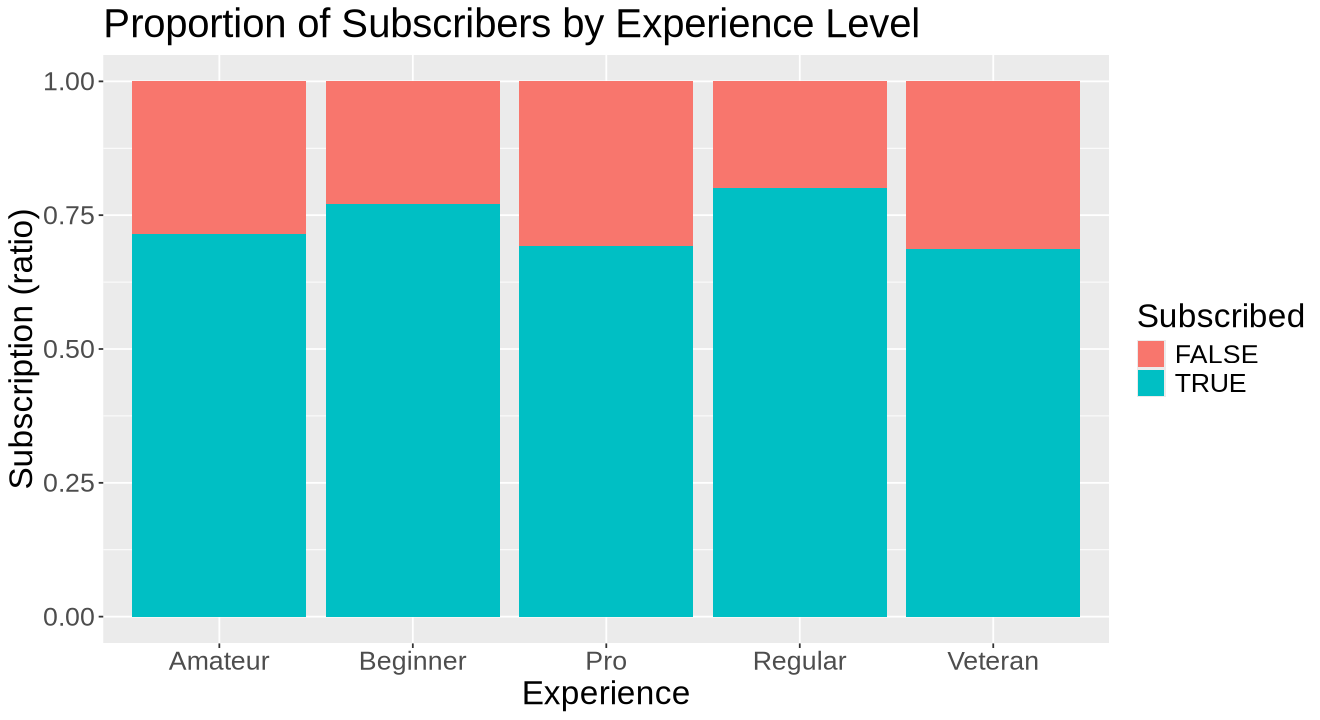

In [87]:
options(repr.plot.width=11, repr.plot.height=6)
#ratio of subscribed people in relation to their experience with the game
experience_plot <- ggplot(player_data, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of Subscribers by Experience Level",
       x = "Experience",
       y = "Subscription (ratio)",
       fill = "Subscribed") +
theme(text = element_text(size = 20))
experience_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


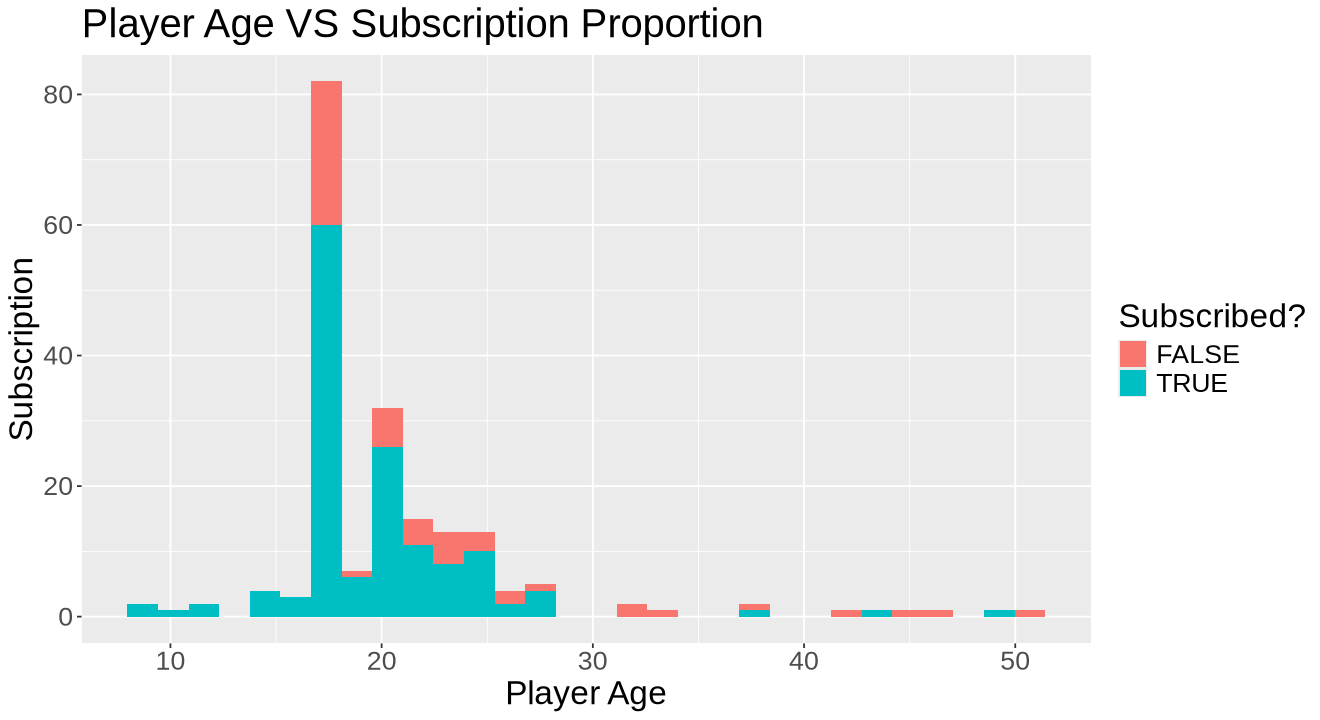

In [88]:
#ratio of subscribed people in relation to their age
age_plot <- player_data |> ggplot (aes (x = Age, fill = subscribe)) +
    geom_histogram () +
    labs(title = "Player Age VS Subscription Proportion",
         x = "Player Age",
         y = "Subscription",
         fill = "Subscribed?") +
    theme (text = element_text (size = 20))
age_plot


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


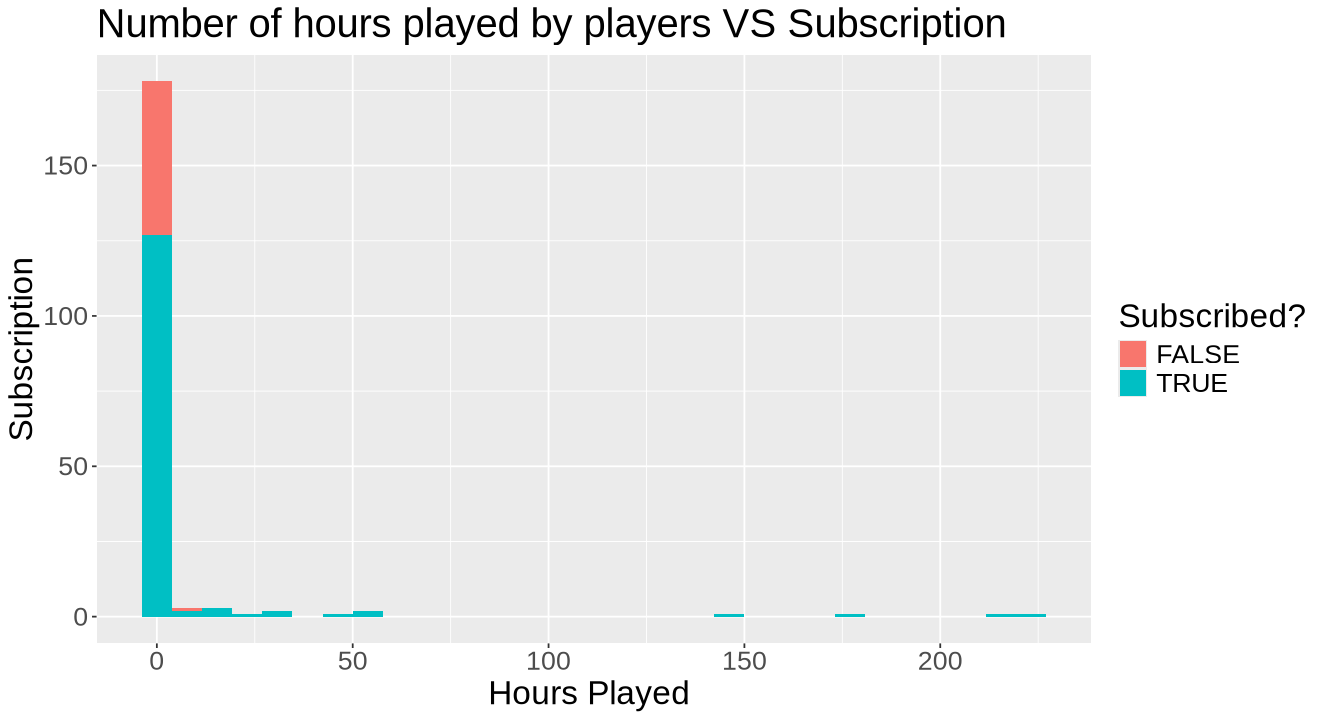

In [89]:
#ratio of subscribed people in relation to their experice with the game
time_plot <- player_data |> ggplot (aes (x = played_hours, fill = subscribe)) +
    geom_histogram () +
    labs(title = "Number of hours played by players VS Subscription",
         x = "Hours Played ",
         y = "Subscription",
         fill = "Subscribed?") +
    theme (text = element_text (size = 20))
time_plot

As we can see, the played hours variable is mainly concentrated under 10 hours (which means that its not standardized), thefore to fix this, the subscription range can be separated into two graphs:



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 13 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 183 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


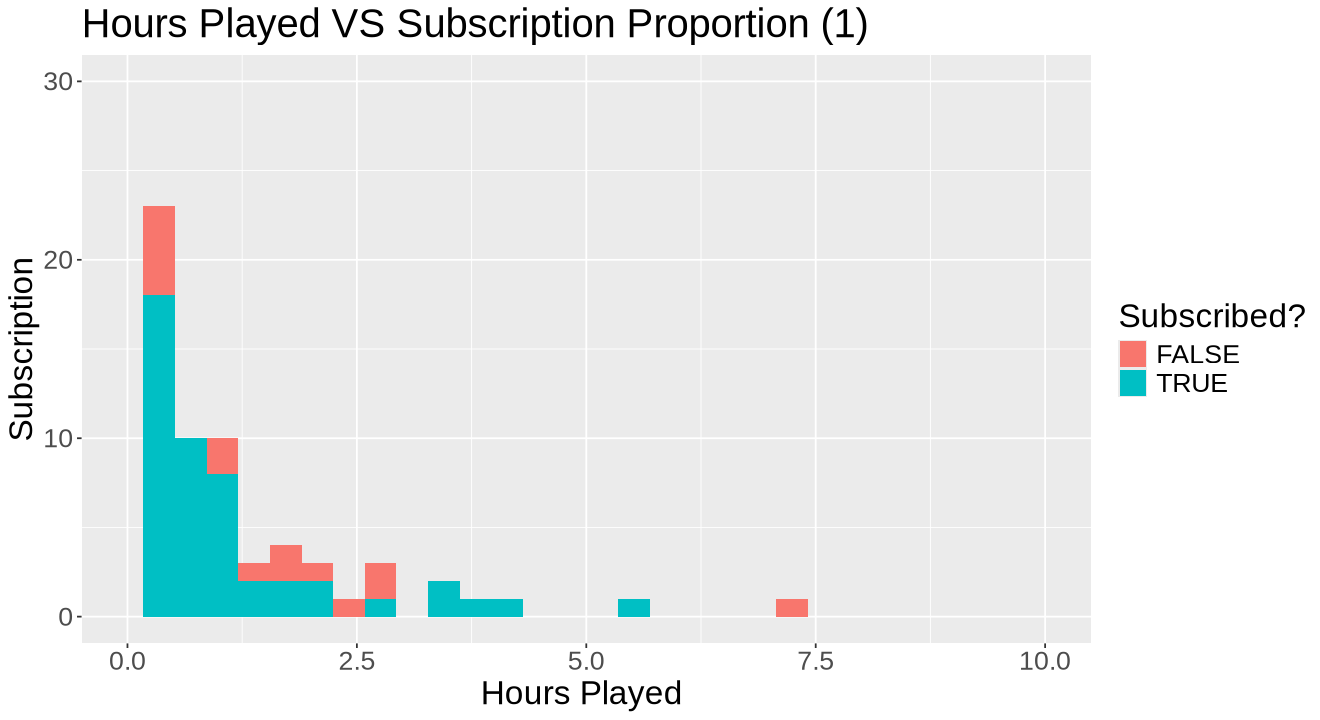

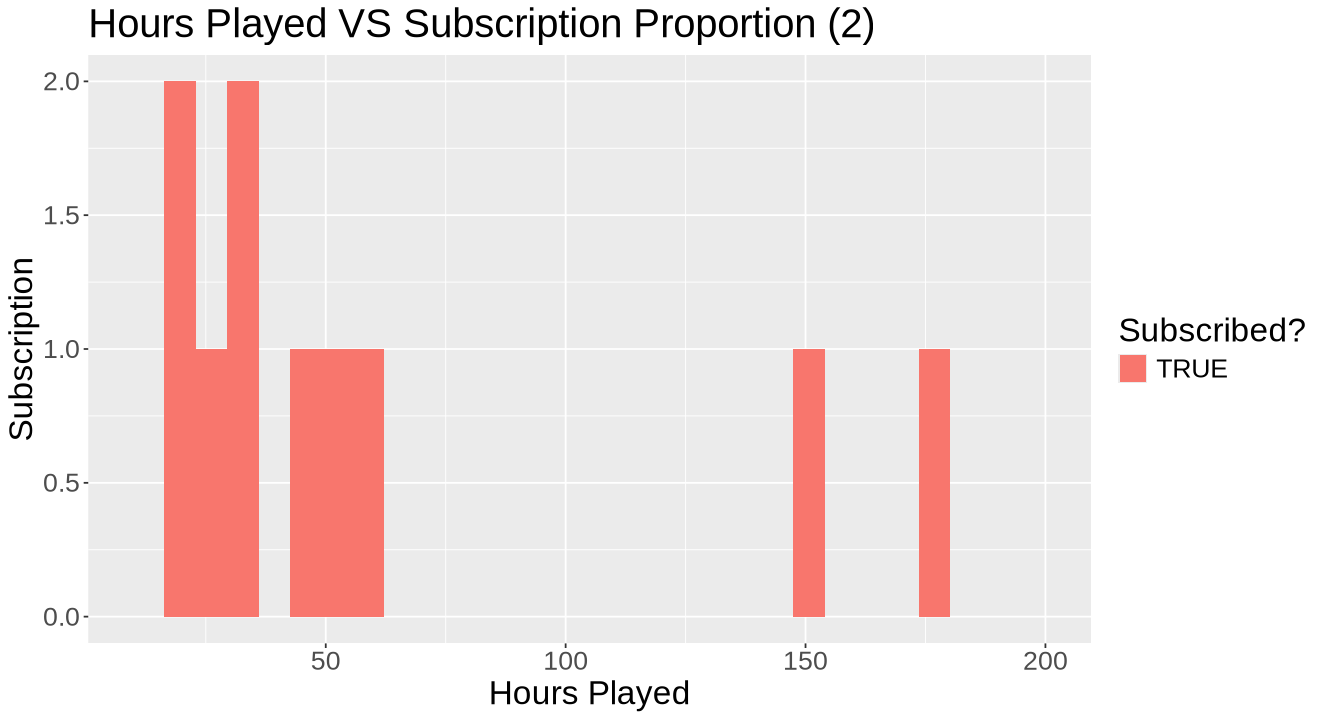

In [95]:
hours_plot_10 <- player_data |> ggplot(aes (x = played_hours, fill = subscribe)) +
    geom_histogram () +
    xlim(c (0, 10)) +
    ylim(c (0, 30)) +
    labs(title="Hours Played VS Subscription Proportion (1)",
         x = "Hours Played ",
         y = "Subscription",
         fill = "Subscribed?") + 
    theme (text = element_text (size = 20))
hours_plot_10

hours_plot_after_10 <- player_data |> ggplot (aes (x = played_hours, fill = subscribe)) +
    geom_histogram () +
    xlim (c (10, 200)) +
    labs(title = "Hours Played VS Subscription Proportion (2)",
         x = "Hours Played",
         y = "Subscription",
         fill = "Subscribed?") + 
    theme (text = element_text (size = 20))
hours_plot_after_10


In the players.csv dataset, only the `played_hours` and `Age` columns are numerical, so we’ll use these to help predict whether a player will subscribe to the game newsletter. Since these values vary quite a bit, we’ll scale them first to ensure that the model weights each variable equally. 

To include the experience column, we need to turn its categories (Amateur, Beginner, Regular, Pro, Veteran) into numbers. We can do this using the `as.numeric()` function. 

We'll split the data so that 70% is used for training and 30% for testing. This helps check how well the model performs on new, unseen data. We’ll also use five-fold cross-validation, which splits the data into five parts and rotates through training and testing on each part. This improves reliability while keeping computation time low compared to using more folds. We'll test different values for k in k-nearest neighbors and use the average accuracy to pick the best one. 

In the recipe, the predictors will be `played_hours`, `Age`, and the numeric version of experience (`num_experience`), and the goal is to predict the `subscribe` outcome. 

Finally, we’ll use set.seed(1234) so that the random sampling gives the same result every time the code is run. The number 1234 was chosen randomly. 


Changing the experience variable into a number:

In [96]:
player_data <- mutate (player_data, num_experience = as.numeric (experience))
player_data

subscribe,played_hours,experience,Age,num_experience
<fct>,<dbl>,<fct>,<dbl>,<dbl>
TRUE,30.3,Pro,9,3
TRUE,3.8,Veteran,17,5
FALSE,0.0,Veteran,17,5
⋮,⋮,⋮,⋮,⋮
FALSE,0.3,Veteran,22,5
FALSE,0.0,Amateur,17,1
FALSE,2.3,Amateur,17,1


Making the plot:

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6231176,5,0.02058593,Preprocessor1_Model01
2,accuracy,binary,0.6459096,5,0.03485264,Preprocessor1_Model02
3,accuracy,binary,0.5786325,5,0.02859099,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13,accuracy,binary,0.7491046,5,0.02164429,Preprocessor1_Model13
14,accuracy,binary,0.7491046,5,0.02164429,Preprocessor1_Model14
15,accuracy,binary,0.7636549,5,0.01627971,Preprocessor1_Model15


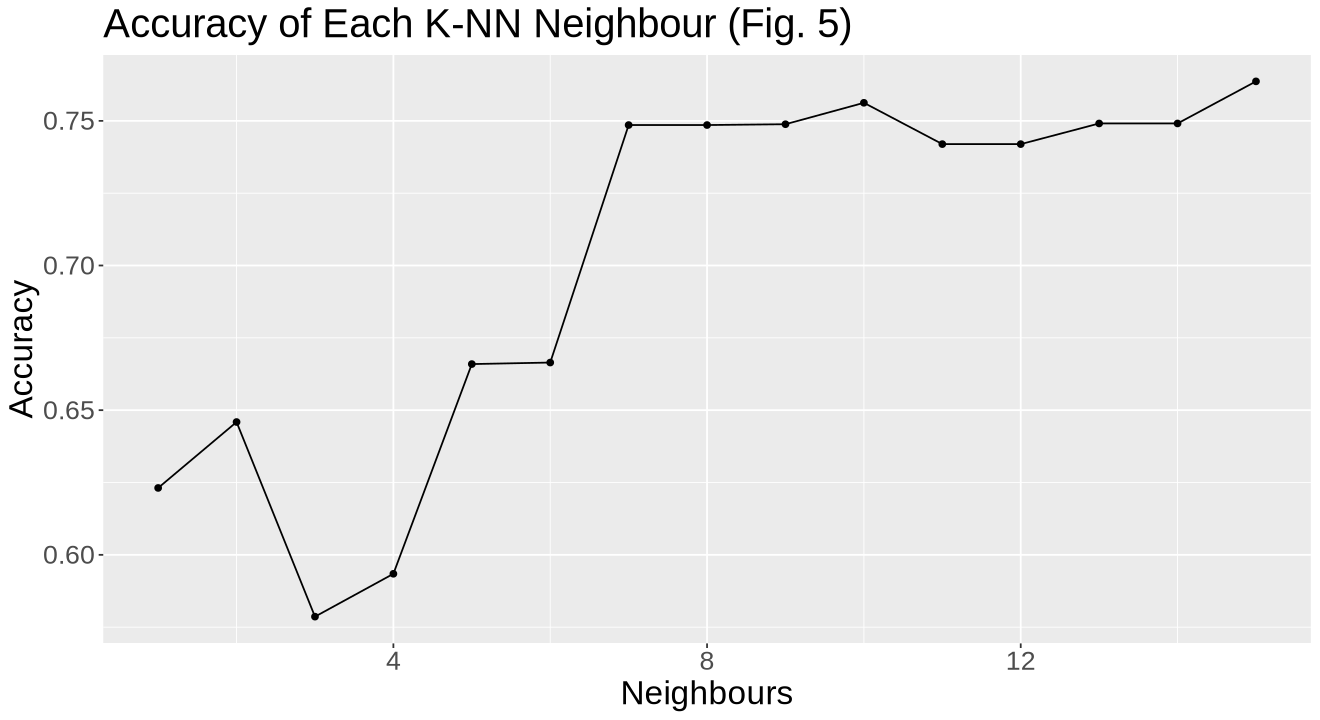

In [97]:
set.seed (1234)

## Splitting data into 70% training and 30% testing
player_split <- initial_split(player_data, prop = 0.70, strata = subscribe)  
player_train <- training(player_split)   
player_test <- testing(player_split)

## player recipe
player_recipe <- recipe(subscribe ~ played_hours + Age + num_experience, data = player_train) |>
    step_center (all_predictors ()) |>
    step_scale (all_predictors ())

## Using spec with tuning k-neighbour 
player_spec <- nearest_neighbor (weight_func = "rectangular", neighbors = tune ()) |>
    set_engine ("kknn") |>
    set_mode ("classification")

## Cross validation (5-fold)
player_vfold <- vfold_cv(player_train, v = 5, strata = subscribe)
k_vals <- tibble (neighbors = seq (from = 1, to = 15, by = 1))

player_fit <- workflow () |>
    add_recipe (player_recipe) |>
    add_model (player_spec) |>
    tune_grid (resamples = player_vfold, grid = k_vals) 

##  Player metrics for accuracy
player_metrics <- player_fit |>
    collect_metrics () |>
    filter(.metric == "accuracy") |> 
    mutate(neighbors = as.double(neighbors))
player_metrics

## Plot
cross_val_plot <- ggplot (player_metrics, aes (x = neighbors, y = mean)) +
    geom_point () +
    geom_line () +
    labs (x = "Neighbours", y = "Accuracy") + 
    ggtitle ("Accuracy of Each K-NN Neighbour (Fig. 5)") +
    theme (text = element_text (size = 20))
cross_val_plot

We can also find the best k-neighbour by filtering out for the neighbour with highest mean:

In [98]:
# Best K-Neighbour
best_k <- player_metrics |>
    arrange (desc (mean)) |>
    head (1) |>
    pull (neighbors)
best_k

[1] 15

Finding the accuracy and confusion matrix to our model:

In [99]:
set.seed(1234) 

## Prediction with testing data
minecraft_predictions <- predict(minecraft_fit, player_test) |>
    bind_cols(player_test)

## To find accuracy %
minecraft_metrics <- minecraft_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter (.metric == "accuracy")
minecraft_metrics

## Confusion matrix for algorithm
minecraft_conf_mat <- minecraft_predictions |> 
     conf_mat(truth = subscribe, estimate = .pred_class)  
minecraft_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7118644


          Truth
Prediction FALSE TRUE
     FALSE     0    1
     TRUE     16   42

## Discussion

##### Subscription Trends and Patterns: 
Looking at the subscription rates by player experience level (Fig. 1), there isn’t much variation—most levels show about 70% of players subscribing to the newsletter. When it comes to age, most subscribers are 20 years old or younger. Around age 18, about 60% of players subscribe, although about 23% of 18-year-olds don’t. After age 30, subscription rates drop sharply. For hours played, most subscribers played less than 1 hour. After 6 hours of gameplay, no one subscribed. 

##### Model Performance: 
Our classifier achieved an accuracy of 71.18%. 
To evaluate it further, we used the confusion matrix to calculate: 

- Precision = correct positive predictions / total positive predictions = 42 / 58 = 72.41% 

- Recall = correct positive predictions / total actual positives = 42 / 43 = 97.67% 

These metrics help confirm how well the model predicts newsletter subscriptions. 

##### Project Expectations: 
I expected the model to reach a reasonable accuracy but didn’t anticipate building an accurate classifier. However, I assumed some variables would be useful in making predictions. 

##### Sources of Error: 
The dataset is fairly small, which might have skewed results. For example, the "age" plot (Player Age VS Subscription Proportion) shows that most players are 20 or younger. Additionally, in the "hours played" plots (Hours Played VS Subscription Proportion (1) & (2)), we also see a sharp drop in players after one hour of gameplay. 

##### Study Insights: 
From the data, player experience doesn’t seem to impact subscription decisions as much as age or hours played. Going forward, marketing efforts could focus more on younger players and look into how to appeal to those who play for longer periods. 

##### Future Questions: 
Future research could explore other variables, like a player’s location or job, to improve the model’s accuracy. Another useful direction would be figuring out how to collect data from players outside the current target group. Doing so might improve precision, recall, and overall performance of the classifier. 